# Part XV - Part XIX

In [1]:
from math import sqrt

plot1 = [1,3]
plot2 = [2,5]

euclidean_distance = sqrt((plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2)
euclidean_distance

2.23606797749979

[[<matplotlib.collections.PathCollection at 0x2c6d31edc88>,

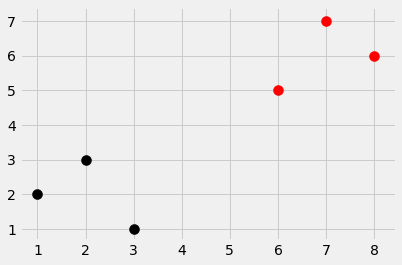

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter
import warnings

style.use('fivethirtyeight')

# create 2D dataset grouped by black and red
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

[[plt.scatter(ii[0],ii[1], s=100, color = i) for ii in dataset[i]] for i in dataset]

1.0

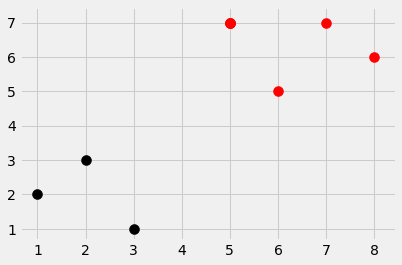

In [19]:
# k nearest neighbors, returning category
def k_nn(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('k is set to a value less than total voting groups')
    
    # populate distances list with euclidean distance
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distance, group])
    
    # get smallest k distances
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0] # what result
    confidence = Counter(votes).most_common(1)[0][1] / k # how many 
    
    return vote_result, confidence

# get the r or k vote from our k_nn method
result, confidence = k_nn(dataset, new_features)

# stick newest feature on the dataset and plot
dataset[result].append(new_features)
[[plt.scatter(ii[0],ii[1], s=100, color = i) for ii in dataset[i]] for i in dataset]
confidence

In [20]:
import pandas as pd
import random

df = pd.read_csv('data/breast-cancer-wisconsin.data.txt')
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)

full_data = df.astype(float).values.tolist()

random.shuffle(full_data)

test_size = .2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}

# slice data 80/20
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

# populate train and test dicts based on tumor type
for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])
    
correct = 0
total = 0
for group in test_set:
    for data in test_set[group]:
        vote, confidence = k_nn(train_set, data, k=5)
        total += 1
        if group == vote:
            correct += 1
        else:
            print("Wrong with confidence", confidence)
            
print("Accuracy:", correct/total)

Wrong with confidence 0.6
Wrong with confidence 0.6
Wrong with confidence 0.6
Wrong with confidence 1.0
Accuracy: 0.9712230215827338
